# 분석 준비

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

---
# 데이터 전처리

In [3]:
# 분석과 관련없는 Id 컬럼 삭제
test.drop(columns=['Id'], inplace=True)
train.drop(columns=['Id'], inplace=True)

## 트레인 데이터 전처리

In [5]:
# 년도, 월에 대한 컬럼은 카테고리형으로 변경
train[['MoSold', 'YrSold']] = train[['MoSold', 'YrSold']].astype('category')

In [8]:
cat_col = train.select_dtypes('category').columns

In [6]:
train['GarageYrBlt'] = train['GarageYrBlt'].fillna(train['GarageYrBlt'].mean()).astype('int64')

In [7]:
int_col = train.select_dtypes('int64').columns
float_col = train.select_dtypes('float64').columns
num_col = train.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(24, 20))
sns.heatmap(train[num_col].corr(), cmap=plt.cm.gist_rainbow, annot=True)
plt.show()

In [9]:
train = pd.concat([train[cat_col].copy(), train[num_col].copy()], axis=1)

In [10]:
train.isna().sum()

MoSold             0
YrSold             0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt        0
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
SalePrice          0
dtype: int64

In [11]:
train['LotFrontage'].fillna(train['LotFrontage'].mean(), inplace=True)

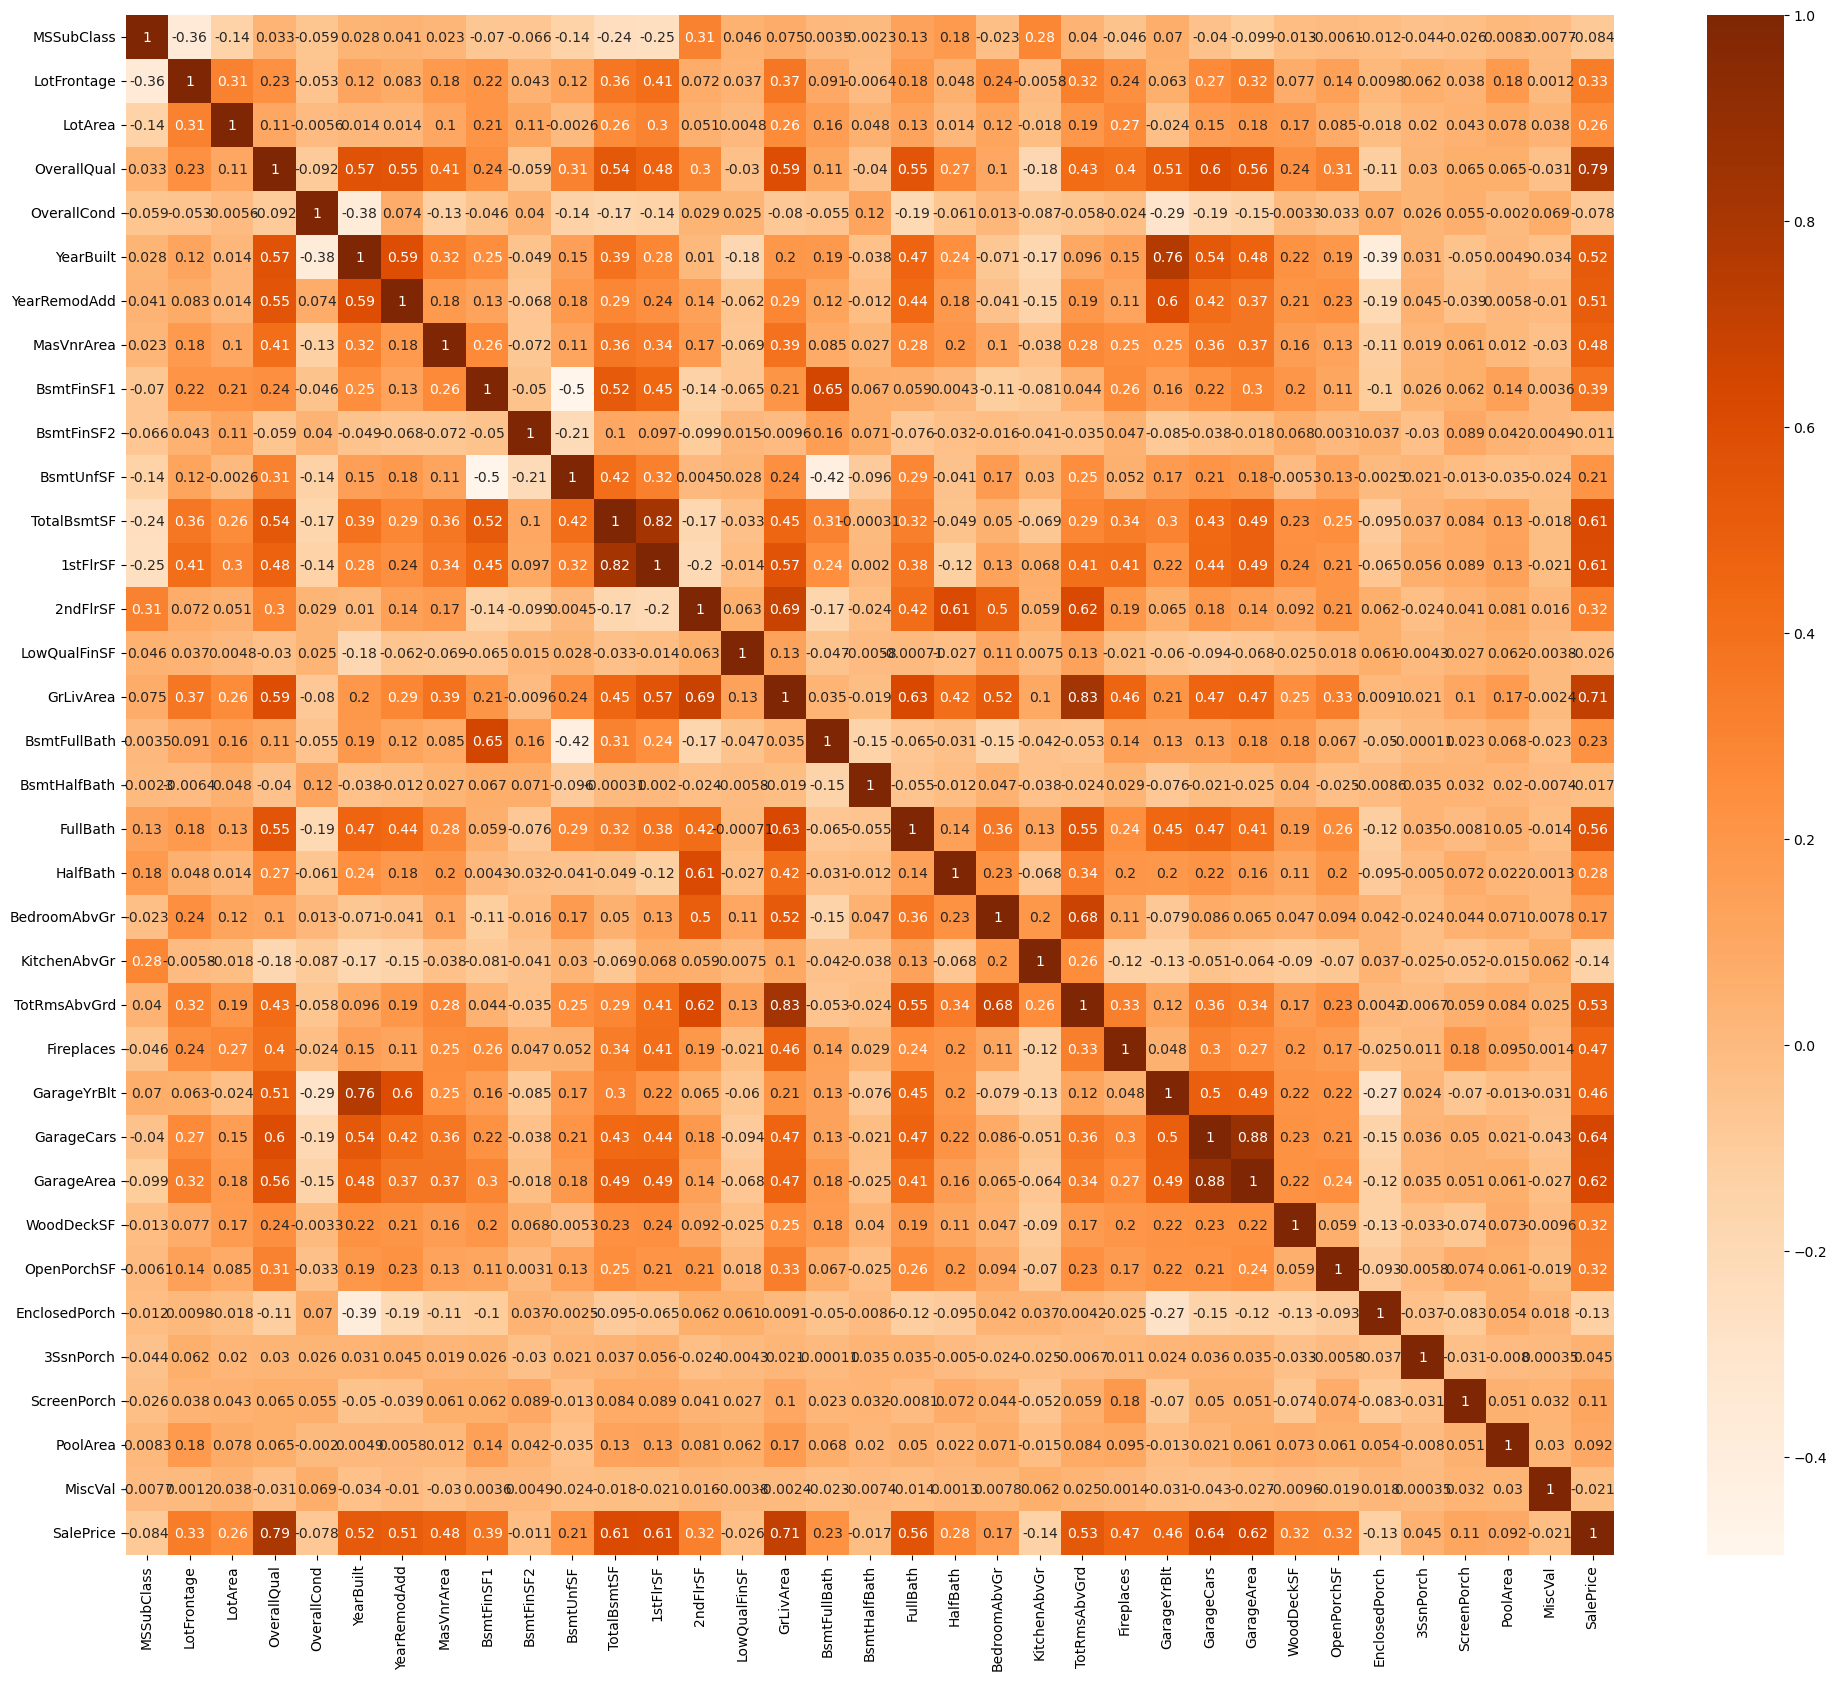

In [121]:
plt.figure(figsize=(24,20))
sns.heatmap(train.corr(), cmap=plt.cm.Oranges, annot=True)
plt.show()

In [12]:
train.columns

Index(['MoSold', 'YrSold', 'MSSubClass', 'LotFrontage', 'LotArea',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'SalePrice'],
      dtype='object')

## 독립-종속변수 분할 및 테스트 데이터에도 전처리 적용

In [13]:
x_train, y_train = train.drop(columns='SalePrice').copy(), train['SalePrice'].copy()

In [14]:
x_test = test[x_train.columns].copy()

In [15]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MoSold         1459 non-null   int64  
 1   YrSold         1459 non-null   int64  
 2   MSSubClass     1459 non-null   int64  
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   OverallQual    1459 non-null   int64  
 6   OverallCond    1459 non-null   int64  
 7   YearBuilt      1459 non-null   int64  
 8   YearRemodAdd   1459 non-null   int64  
 9   MasVnrArea     1444 non-null   float64
 10  BsmtFinSF1     1458 non-null   float64
 11  BsmtFinSF2     1458 non-null   float64
 12  BsmtUnfSF      1458 non-null   float64
 13  TotalBsmtSF    1458 non-null   float64
 14  1stFlrSF       1459 non-null   int64  
 15  2ndFlrSF       1459 non-null   int64  
 16  LowQualFinSF   1459 non-null   int64  
 17  GrLivArea      1459 non-null   int64  
 18  BsmtFull

In [18]:
x_test['GarageYrBlt'] = x_test['GarageYrBlt'].fillna(train['GarageYrBlt'].mean()).astype('int64')

In [25]:
x_test[['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
        'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCars',
        'GarageArea']] = x_test[['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
        'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCars',
        'GarageArea']].bfill().astype('int64')

In [26]:
# 년도, 월에 대한 컬럼은 카테고리형으로 변경
x_test[['MoSold', 'YrSold']] = x_test[['MoSold', 'YrSold']].astype('category')

In [24]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   MoSold         1460 non-null   category
 1   YrSold         1460 non-null   category
 2   MSSubClass     1460 non-null   int64   
 3   LotFrontage    1460 non-null   int64   
 4   LotArea        1460 non-null   int64   
 5   OverallQual    1460 non-null   int64   
 6   OverallCond    1460 non-null   int64   
 7   YearBuilt      1460 non-null   int64   
 8   YearRemodAdd   1460 non-null   int64   
 9   MasVnrArea     1460 non-null   int64   
 10  BsmtFinSF1     1460 non-null   int64   
 11  BsmtFinSF2     1460 non-null   int64   
 12  BsmtUnfSF      1460 non-null   int64   
 13  TotalBsmtSF    1460 non-null   int64   
 14  1stFlrSF       1460 non-null   int64   
 15  2ndFlrSF       1460 non-null   int64   
 16  LowQualFinSF   1460 non-null   int64   
 17  GrLivArea      1460 non-null   in

## 변수선택 혹은 스케일링 적용하지 않은 백업 만들어놓기

In [99]:
x_train_cp = x_train.copy()
x_test_cp = x_test.copy()

## 전처리 결과 확인

In [27]:
display(x_train.isna().sum())

display(x_test.isna().sum())

MoSold           0
YrSold           0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
dtype: int64

MoSold           0
YrSold           0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
dtype: int64

## 다중공선성(VIF) 확인

- VIF 가 inf로 나오는 이유는 분모가 0이 되는 값이 있기 때문
- 상관계수가 1인 독립변수에 대해서 VIF를 계산하면 분모가 0이 되어 VIF가 inf가 되어버림.
- inf로 나오는 변수는 무조건 없어져야함.

In [280]:
vif = pd.DataFrame()

vif["features"] = x_train.columns 
vif["VIF Factor"] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]

vif = vif.sort_values(by="VIF Factor", ascending=True)
vif = vif.reset_index().drop(columns='index')
vif

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,features,VIF Factor
0,MiscVal,1.031191e+00
1,3SsnPorch,1.036871e+00
2,PoolArea,1.106498e+00
3,ScreenPorch,1.190945e+00
4,BsmtHalfBath,1.219193e+00
5,EnclosedPorch,1.446991e+00
6,OpenPorchSF,1.825975e+00
7,MasVnrArea,1.845745e+00
8,WoodDeckSF,1.905230e+00
9,LotArea,2.647804e+00


In [281]:
vif_col = vif.iloc[:28, 0]
vif_col

0           MiscVal
1         3SsnPorch
2          PoolArea
3       ScreenPorch
4      BsmtHalfBath
5     EnclosedPorch
6       OpenPorchSF
7        MasVnrArea
8        WoodDeckSF
9           LotArea
10       Fireplaces
11         HalfBath
12     BsmtFullBath
13       MSSubClass
14           MoSold
15      LotFrontage
16         FullBath
17     BedroomAbvGr
18       GarageArea
19       GarageCars
20     KitchenAbvGr
21      OverallCond
22      OverallQual
23     TotRmsAbvGrd
24        YearBuilt
25     YearRemodAdd
26      GarageYrBlt
27           YrSold
Name: features, dtype: object

In [291]:
x_train = x_train[vif_col]
x_test = x_test[vif_col]

## 범주형 독립변수 -> 원핫 인코딩하여 추가 사용

In [331]:
view_train = pd.read_csv('train.csv')
categories_train = view_train[['MSZoning', 'Street', 'LotShape', 'LandContour', 'SaleType', 'SaleCondition']]
onehot_train = pd.get_dummies(categories_train)

view_test = pd.read_csv('test.csv')
categories_test = view_test[['MSZoning', 'Street', 'LotShape', 'LandContour', 'SaleType', 'SaleCondition']]
onehot_test = pd.get_dummies(categories_test)

In [336]:
x_train = pd.concat([x_train, onehot_train], axis=1)
x_test = pd.concat([x_test, onehot_test], axis=1)

## 최종적으로 사용하는 독립변수 목록 생성

In [343]:
used_features = x_train.columns

---
# 데이터 스케일링
- 스케일링 방법을 바꿔가며 모델 성능 측정 반복

## 스케일링 X

In [279]:
scaler = 'Not Scaled'
x_train = x_train
x_test = x_test

## 표준화

In [383]:
from sklearn.preprocessing import StandardScaler

In [384]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

## Min-Max 정규화

In [385]:
from sklearn.preprocessing import MinMaxScaler

In [386]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

---
# 모델 학습

In [294]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
import numpy as np

## 선형 회귀

### 모델 학습 및 예측

In [431]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [432]:
y_pred = model.predict(x_train)

### 선형회귀 결과 txt 저장

In [253]:
with open('output.txt', 'w') as f:
    print('=========================', file=f)

In [433]:
with open('output.txt', 'a') as f:
    print(f'used features: {used_features}', file=f)
    print(f'scaler: {scaler}', file=f)
    print(f'model: {model}', file=f)
    print('R^2:',metrics.r2_score(y_train, y_pred), file=f)
    print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1), file=f)
    print('MAE:',metrics.mean_absolute_error(y_train, y_pred), file=f)
    print('MSE:',metrics.mean_squared_error(y_train, y_pred), file=f)
    print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)), file=f)
    print('=========================', file=f)

### 선형회귀 결과 시각화

In [347]:
from matplotlib import font_manager, rc, rcParams

font_path = "C:/Windows/Fonts/MALGUN.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
rcParams['axes.unicode_minus'] = False

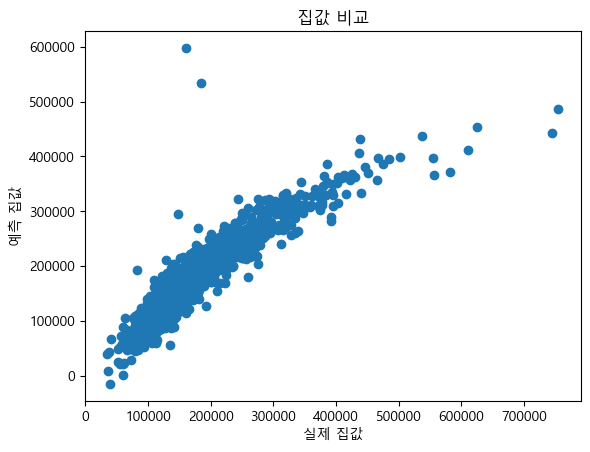

In [390]:
plt.scatter(y_train, y_pred)
plt.xlabel("실제 집값")
plt.ylabel("예측 집값")
plt.title("집값 비교")
plt.show()

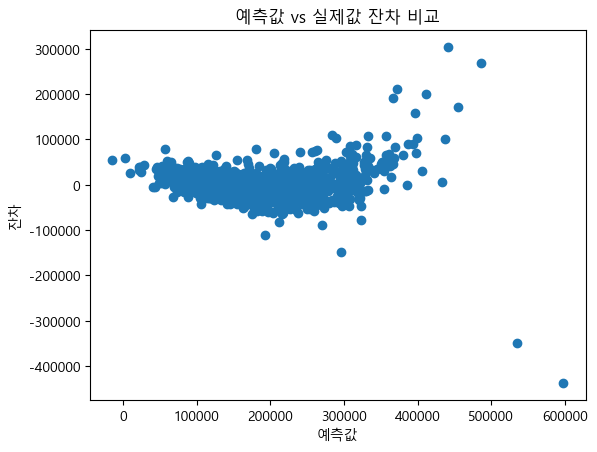

In [391]:
plt.scatter(y_pred, y_train-y_pred)
plt.title("예측값 vs 실제값 잔차 비교")
plt.xlabel("예측값")
plt.ylabel("잔차")
plt.show()

## Lasso

### 모델 학습 및 예측

In [392]:
model = Lasso(alpha=0.5, random_state=369)
model.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.987e+10, tolerance: 9.208e+08
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.5, random_state=369)

In [393]:
y_pred = model.predict(x_train)

### Lasso 결과 txt 저장

In [394]:
with open('output.txt', 'a') as f:
    print(f'used features: {used_features}', file=f)
    print(f'scaler : {scaler}', file=f)
    print(f'model : {model}', file=f)
    print('R^2:',metrics.r2_score(y_train, y_pred), file=f)
    print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1), file=f)
    print('MAE:',metrics.mean_absolute_error(y_train, y_pred), file=f)
    print('MSE:',metrics.mean_squared_error(y_train, y_pred), file=f)
    print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)), file=f)
    print('=========================', file=f)

### Lasso 결과 시각화

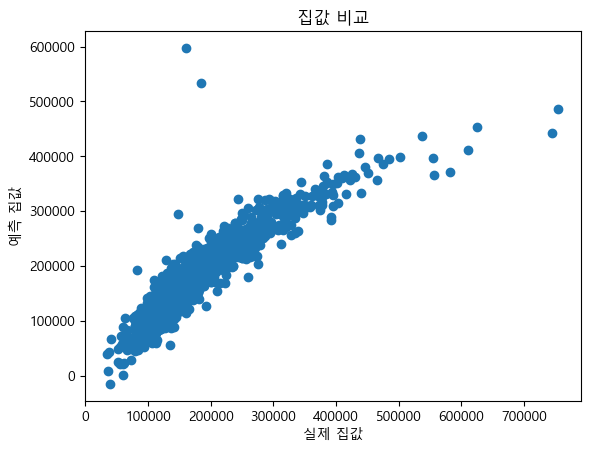

In [395]:
plt.scatter(y_train, y_pred)
plt.xlabel("실제 집값")
plt.ylabel("예측 집값")
plt.title("집값 비교")
plt.show()

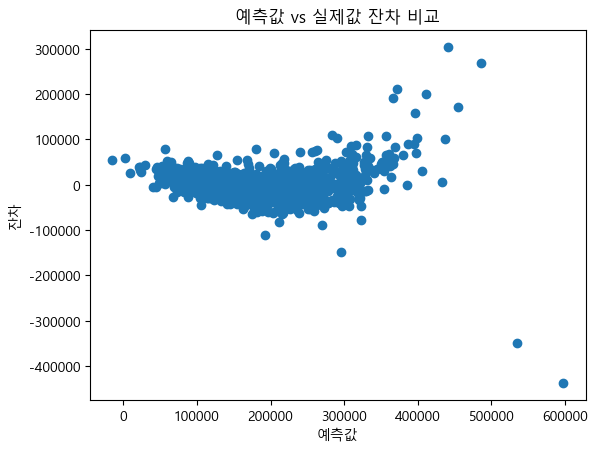

In [396]:
plt.scatter(y_pred, y_train-y_pred)
plt.title("예측값 vs 실제값 잔차 비교")
plt.xlabel("예측값")
plt.ylabel("잔차")
plt.show()

## Ridge

### 모델 학습 및 예측

In [397]:
model = Ridge(alpha=0.25)
model.fit(x_train, y_train)

Ridge(alpha=0.25)

In [398]:
y_pred = model.predict(x_train)

### Ridge 결과 txt 저장

In [399]:
with open('output.txt', 'a') as f:
    print(f'used features: {used_features}', file=f)
    print(f'scaler : {scaler}', file=f)
    print(f'model : {model}', file=f)
    print('R^2:',metrics.r2_score(y_train, y_pred), file=f)
    print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1), file=f)
    print('MAE:',metrics.mean_absolute_error(y_train, y_pred), file=f)
    print('MSE:',metrics.mean_squared_error(y_train, y_pred), file=f)
    print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)), file=f)
    print('=========================', file=f)

### Ridge 결과 시각화

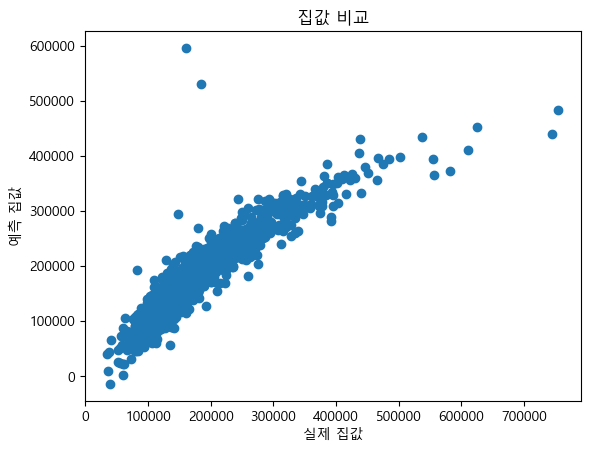

In [400]:
plt.scatter(y_train, y_pred)
plt.xlabel("실제 집값")
plt.ylabel("예측 집값")
plt.title("집값 비교")
plt.show()

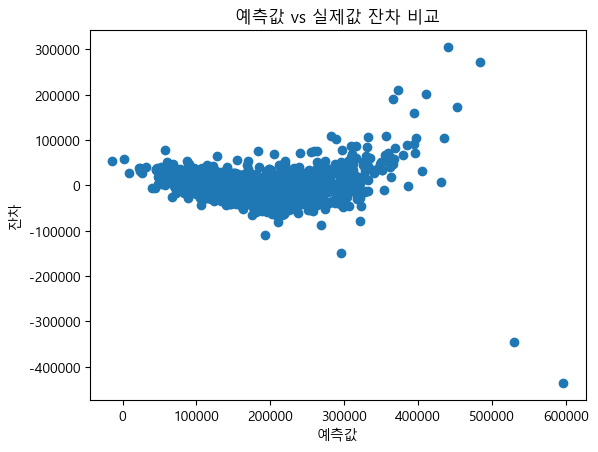

In [401]:
plt.scatter(y_pred, y_train-y_pred)
plt.title("예측값 vs 실제값 잔차 비교")
plt.xlabel("예측값")
plt.ylabel("잔차")
plt.show()

## ElasticNet

### 모델 학습 및 예측
- ElasticNet은 정규화된 데이터만 학습 가능

In [402]:
model = ElasticNet(alpha=0.1)
model.fit(x_train, y_train)

ElasticNet(alpha=0.1)

In [403]:
y_pred = model.predict(x_train)

### ElasticNet 결과 txt 저장

In [404]:
with open('output.txt', 'a') as f:
    print(f'used features: {used_features}', file=f)
    print(f'scaler : {scaler}', file=f)
    print(f'model : {model}', file=f)
    print('R^2:',metrics.r2_score(y_train, y_pred), file=f)
    print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1), file=f)
    print('MAE:',metrics.mean_absolute_error(y_train, y_pred), file=f)
    print('MSE:',metrics.mean_squared_error(y_train, y_pred), file=f)
    print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)), file=f)
    print('=========================', file=f)

### ElasticNet 결과 시각화

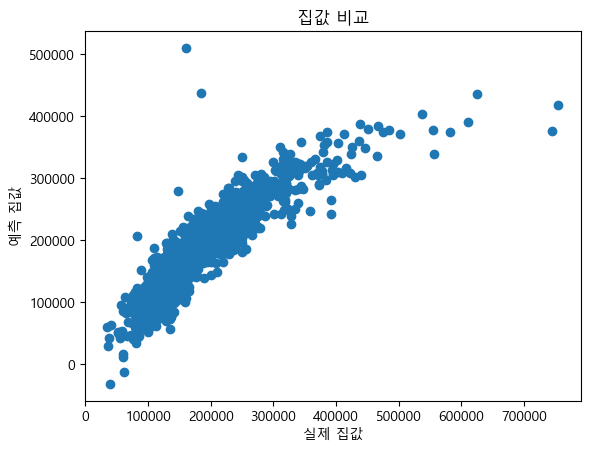

In [313]:
plt.scatter(y_train, y_pred)
plt.xlabel("실제 집값")
plt.ylabel("예측 집값")
plt.title("집값 비교")
plt.show()

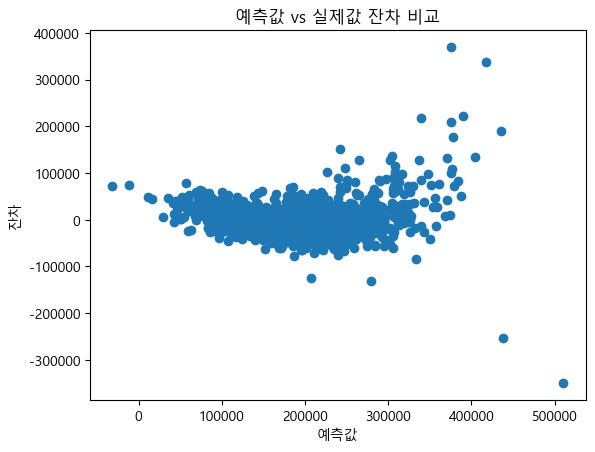

In [314]:
plt.scatter(y_pred, y_train-y_pred)
plt.title("예측값 vs 실제값 잔차 비교")
plt.xlabel("예측값")
plt.ylabel("잔차")
plt.show()

## 랜덤포레스트

In [168]:
from sklearn.ensemble import RandomForestRegressor

### 그리드서치
- 사용되는 하이퍼파라미터 종류가 많을 경우
- 각 하이퍼파라미터의 iter가 담긴 딕셔너리를 전달해주면 가장 성능이 좋은 조합을 찾아줌

In [439]:
from sklearn.model_selection import GridSearchCV

In [448]:
rf_model = RandomForestRegressor()
rf_params = {'random_state':[123, 369, 1004], 'n_estimators':[150, 250, 500, 1000],
             'max_depth':[5, 10, 15, 20, 30], 'max_features':["auto", "sqrt", "log2"]}
grid_rf_model = GridSearchCV(estimator=rf_model, param_grid=rf_params, scoring='r2', cv=5)
log_y = np.log(y_train)
grid_rf_model.fit(x_train, log_y)
print(grid_rf_model.best_params_)

{'max_depth': 15, 'max_features': 'sqrt', 'n_estimators': 1000, 'random_state': 1004}


### 모델 학습 및 예측

- OOB Score ( Out-Of-Bag Score )
    - 부트스트랩을 통해 추출되는 샘플은 전체 데이터의 63.2%정도인데,
    - 나머지 37% 데이터로 모델의 정확도를 측정한 값
    - 과적합 여부를 알 수 있는 지표 중 하나

In [449]:
model = RandomForestRegressor(random_state=1004, max_depth=15, max_features='sqrt', n_estimators=1000, oob_score=True)
model.fit(x_train, y_train)

RandomForestRegressor(max_depth=15, max_features='sqrt', n_estimators=1000,
                      oob_score=True, random_state=1004)

In [450]:
y_pred = model.predict(x_train)

### RandomForest 결과 txt 저장

In [451]:
with open('output.txt', 'a') as f:
    print(f'used features: {used_features}', file=f)
    print(f'scaler : {scaler}', file=f)
    print(f'model : {model}', file=f)
    print('R^2:',metrics.r2_score(y_train, y_pred), file=f)
    print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1), file=f)
    print('MAE:',metrics.mean_absolute_error(y_train, y_pred), file=f)
    print('MSE:',metrics.mean_squared_error(y_train, y_pred), file=f)
    print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)), file=f)
    print('OOB Score:', model.oob_score_, file=f)
    print('=========================', file=f)

### RandomForest 결과 시각화

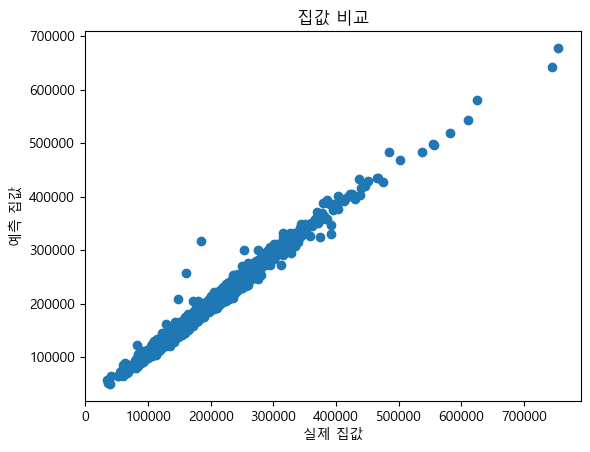

In [452]:
plt.scatter(y_train, y_pred)
plt.xlabel("실제 집값")
plt.ylabel("예측 집값")
plt.title("집값 비교")
plt.show()

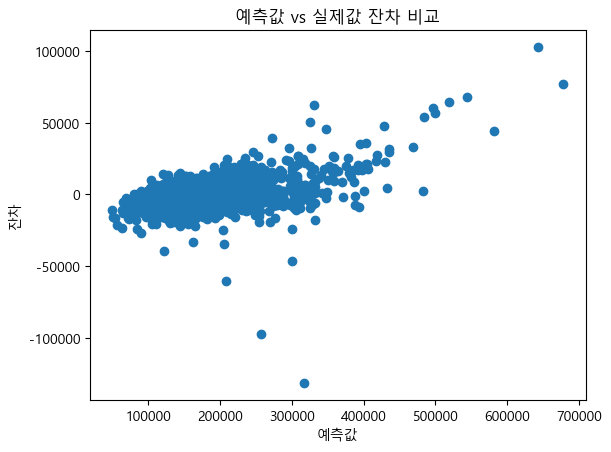

In [453]:
plt.scatter(y_pred, y_train-y_pred)
plt.title("예측값 vs 실제값 잔차 비교")
plt.xlabel("예측값")
plt.ylabel("잔차")
plt.show()

### RandomForest 모델의 변수 중요도 출력

In [476]:
feature_importances = pd.DataFrame({ 'Feature':used_features, 'Feature_Importances':model.feature_importances_})
feature_importances.sort_values(by='Feature_Importances', ascending=False, inplace=True)

feature_importances.iloc[:30, ...]

,Feature,Feature_Importances
5,OverallQual,0.131831
17,GrLivArea,0.103332
13,TotalBsmtSF,0.079681
27,GarageCars,0.075372
28,GarageArea,0.063913
14,1stFlrSF,0.059780
7,YearBuilt,0.058726
26,GarageYrBlt,0.039326
10,BsmtFinSF1,0.039317
15,2ndFlrSF,0.036910


---
# 분석 결과 csv 내보내기

## Submission

In [454]:
y_pred = model.predict(x_test)

In [455]:
Pred_SalePrice = pd.DataFrame({'Pred_SalePrice':map(lambda x: round(x), y_pred)})

In [456]:
Pred_SalePrice['Id'] = range(1461, 2920)
Pred_SalePrice = Pred_SalePrice[['Id', 'Pred_SalePrice']]
Pred_SalePrice.rename(columns={'Pred_SalePrice':'SalePrice'}, inplace=True)
Pred_SalePrice.to_csv('submission.csv', encoding='utf-8', index=False)

## 트레인셋 예측 비교

In [458]:
y_pred = model.predict(x_train)

In [459]:
Pred_SalePrice = pd.DataFrame({'Pred_SalePrice':map(lambda x: round(x), y_pred)})

In [478]:
result_comparsion = pd.concat([y_train, Pred_SalePrice], axis=1)
result_comparsion['residual'] = result_comparsion['Pred_SalePrice'] - result_comparsion['SalePrice']
result_comparsion['residual_%'] = (result_comparsion['residual'] / result_comparsion['SalePrice']) * 100
result_comparsion['residual_%'] = result_comparsion['residual_%'].apply(lambda x: str(round(x, 4))+'%').astype('string')
result_comparsion.to_csv('result_comparsion.csv', encoding='utf-8', index=False)
result_comparsion

,SalePrice,Pred_SalePrice,residual,residual_%
0,208500,208743,243,0.1165%
1,181500,175323,-6177,-3.4033%
2,223500,219085,-4415,-1.9754%
3,140000,153966,13966,9.9757%
4,250000,269536,19536,7.8144%
...,...,...,...,...
1455,175000,177224,2224,1.2709%
1456,210000,210925,925,0.4405%
1457,266500,246403,-20097,-7.5411%
1458,142125,138051,-4074,-2.8665%
